In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

%matplotlib inline
plt.style.use('tableau-colorblind10')

In [2]:
# archivo mean-zone-yearly-data.txt es generado por compute_statistics.py
df_1 = pd.read_csv("./mean-zone-yearly-data.txt", sep="\t", header=None, names=["zone", "mean", "std"])
df_1.head()

,zone,mean,std
0,11,1676.956836,1174.208038
1,10,2002.114568,586.730285
2,13,393.766455,216.298357
3,12,472.025241,263.404236
4,15,139.733594,164.816481


In [3]:
# archivo median-year-zone-yearly-data.txt es generado por compute_statistics.py
df_2 = pd.read_csv("./median-year-zone-yearly-data.txt", sep="\t", header=None, names=["zone", "year", "median"])
df_2 = df_2.sort_values(by=["zone", "year"])
df_2.head()

# zone == 0 significa que es una zona no identificada, posiblemente estaciones
# fuera de chile que no fueron filtradas correctamente

,zone,year,median
990,0,1995,255.40
983,0,1998,1931.70
984,0,1999,95.90
695,0,2001,491.65
689,0,2002,856.10


### plot de SPI anual para cada zona creada

Debemos conocer las zonas creadas y como nombrarlas

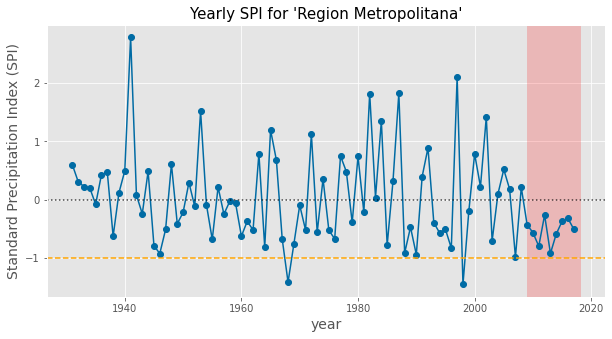

In [28]:
# plot para division de zonas segun regiones politicas de chile
zone = 13
zone_name = "Region Metropolitana"

mu = float(df_1[df_1["zone"] == zone]["mean"])
std = float(df_1[df_1["zone"] == zone]["std"])
precip = np.array(df_2[df_2["zone"] == zone]["median"], dtype=float)
years = np.array(df_2[df_2["zone"] == zone]["year"], dtype=int)

y = (precip - mu) / std
x =years
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, '-o')
ax.axvspan(2009, 2018, color="red", alpha=0.2)
ax.axhline(-1.0, color="orange", linestyle="--")
ax.axhline(0, color="black", linestyle=":", alpha=0.7)
ax.set_xlabel("year", fontsize=14)
ax.set_ylabel("Standard Precipitation Index (SPI)", fontsize=14)
ax.set_title("Yearly SPI for '{}'".format(zone_name), fontsize=15)
ticks = np.arange(int(years[0] / 10)  * 10, 2020, 15)

In [22]:
# archivo yearly-data-with-zone.txt es generado por compute_statistics.py
df_3 = pd.read_csv("./yearly-data-with-zone.txt", sep="\t", header=None, names=["code", "year", "precip", "zone"])
df_3 = df_3.sort_values(by=["zone", "year"])
df_3

,code,year,precip,zone
18605,11700001,1995,255.40,0
18606,11700001,1998,387.70,0
18653,12125001,1998,3475.70,0
18607,11700001,1999,95.90,0
18608,11700001,2001,271.60,0
...,...,...,...,...
65,180005,2017,3.10,15
2141,1201003,2017,153.75,15
2263,1300006,2017,322.30,15
2305,1300007,2017,102.30,15


## Plot de histograma y distribucion normal 
la distribucion normal es utilizada para obtener los indices de precipitacion

Text(0.5, 1.0, 'Fit results: mu = 393.77,  std = 216.30')

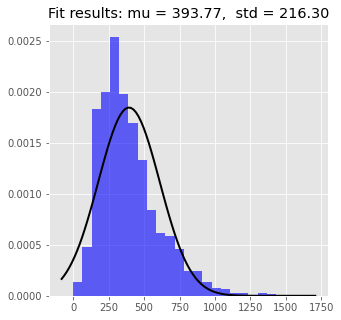

In [27]:

precip_yearly = np.array(df_3[df_3["zone"] == zone]["precip"], dtype=float)
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(precip_yearly, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

### Plot de localizacion geografica y lluvia anual promedio versus latitud